# Coherent/Squeezed states and Thermal state of a quantum harmonic oscillator


>Quantum Toolbox in Python(Qutip) 是一个十分强大的用于量子力学计算的python第三方库，最近边阅读它的源码和文档边复习量子光学，那它来做了一些量子光学中常见的态：热态，相干态，压缩态的可视化。这些其实你用任意一个科学计算语言，如`MATLAB`,`Mathematica`都能做，但qutip自身就集成了许多常用的功能并将其封装成了函数，比如求期望，求涨落，求解动力学演化主方程等，因此许多复杂的计算在`qutip`中往往只需要一条指令就能完成，相对来说比自己编写代码高效了许多。

首先，`import`需要的包

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

## The Vacuum of harmonic oscillator
>作为一个简单的例子，我们先来看看真空态的能量涨落

### Set Parameters

In [12]:
N = 50
w = 1 * 2 * np.pi            #oscillatro frequency
tlist = np.linspace(0,4,101) #periods

# operators
a = destroy(N)
n = num(N)
x = (a + a.dag())/np.sqrt(2)
p = -1j * (a-a.dag())/np.sqrt(2)
#Hamiltonian
H = (w*a.dag()*a + 1/2)

In [13]:
# Set the vacuum state
vacuum = basis(N,0)
# Solve the dynamic master equation
result0 = mesolve(H, vacuum, tlist)

接下来是画出能量涨落的图

<ipython-input-14-fe591e1cf1bd>:8: RuntimeWarning: invalid value encountered in sqrt
  ax.fill_between(tlist,e_H-np.sqrt(v_H),e_H+np.sqrt(v_H),color = "blue",alpha = 0.5)


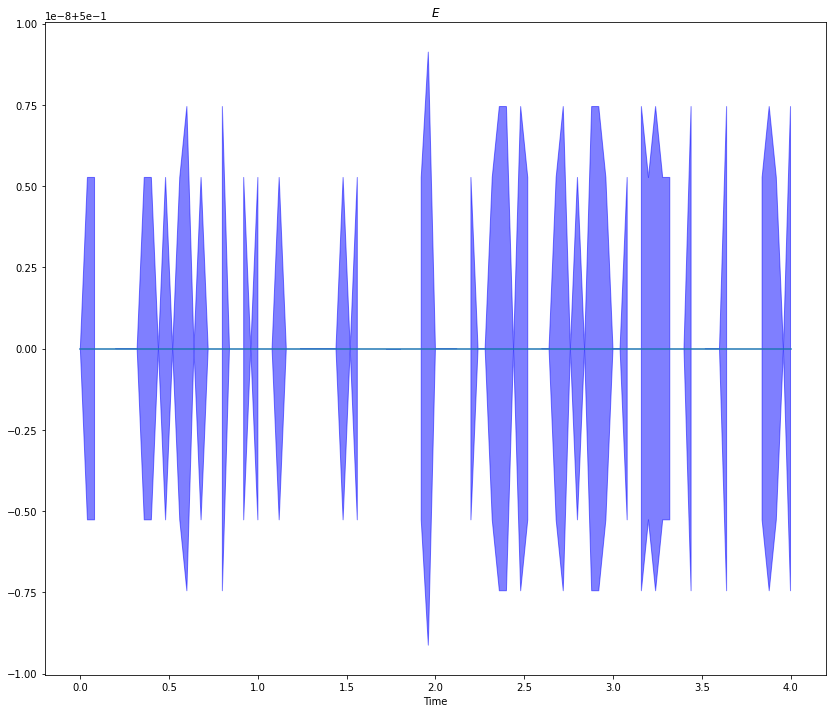

In [14]:
# Caculate the expect and variance for Hamiltonian with the vacuum
e_H = expect(H,result0.states)
v_H = variance(H,result0.states)

# Plot
fig,ax = plt.subplots(figsize=(14,12))
ax.plot(tlist,e_H)
ax.fill_between(tlist,e_H-np.sqrt(v_H),e_H+np.sqrt(v_H),color = "blue",alpha = 0.5)
ax.set_xlabel("Time")
ax.set_title(r"$E$")
plt.savefig("./HofVancum.jpg")
plt.show()

## Functions for plotting
因为之后我们要常常绘制算符的涨落图，所以我们直接定义一个绘图的函数。

In [15]:
def plot_expect_with_variance(N, op_list, op_title, states):
    """
    Plot the expectation value of an operator (list of operators)
    with an envelope that describes the operators variance.
    """
    
    fig, axes = plt.subplots(1, len(op_list), figsize=(14,3))
    for idx, op in enumerate(op_list):
        
        e_op = expect(op, states)
        v_op = variance(op, states)
        
        axes[idx].fill_between(tlist, e_op - np.sqrt(v_op), e_op + np.sqrt(v_op), color="green", alpha=0.5);
        axes[idx].plot(tlist, e_op, label="expectation")
        axes[idx].set_xlabel('Time')
        axes[idx].set_title(op_title[idx])
    
    return fig,axes
 

# Coherent state

众所周知，压缩态是湮灭算符的本征态，更重要的是，它是所谓的“最小不确定度”态。量子光学既然以量子冠名，那么它的力学量算符就应该满足不确定度关系，经典的达朗贝尔方程解出来的电磁场特解是正弦波，而量子光学里的电磁场（对应到谐振子中就是坐标和动量算符）因为不确定度关系，应该是带噪声的正弦波。而坐标动量算符满足的不确定度关系为：

$$ \Delta x\Delta p\ge\hbar/2 $$
所谓的最小不确定度态是指，在相干态中，坐标和动量满足：
$$ \Delta x\Delta p =\hbar/2 $$
我们可以从下面的时间演化图像看出来：

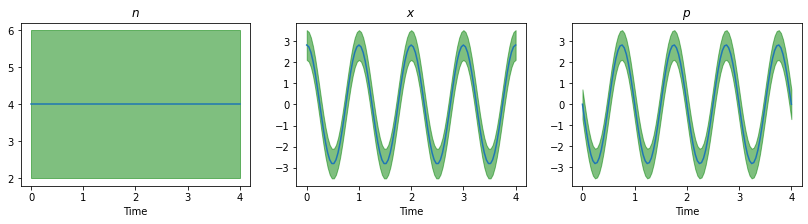

In [17]:
coh = coherent(N, 2.0)
resultc = mesolve(H, coh, tlist)
plot_expect_with_variance(N, [n,x,p], [r'$n$',r'$x$',r'$p$'],resultc.states);

同时，经过一些简单的推到我们可以知道相干态粒子数分布应该是泊松分布的形式，我们可以看看相干态的粒子数分布和Wigner准概率分布：

(<Figure size 576x288 with 2 Axes>,
 array([<AxesSubplot:xlabel='Fock number', ylabel='Occupation probability'>,
        <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>],
       dtype=object))

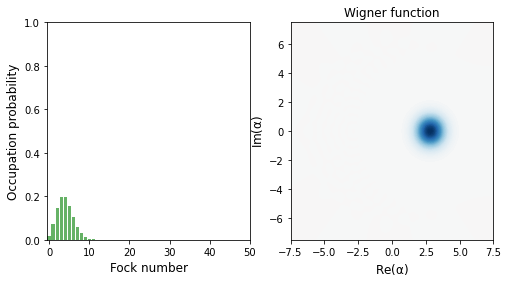

In [18]:
plot_wigner_fock_distribution(coh)

## Squeezed vacuum

我们刚刚说了，相干态是最小不确定度态，而压缩态是在`x`和`p`两个算符中，压缩了某一个算符的不确定度，但相应的，受到不确定度关系的约束，另一个算符的不确定度就会相应增加。在图中我们可以很直观的看到：

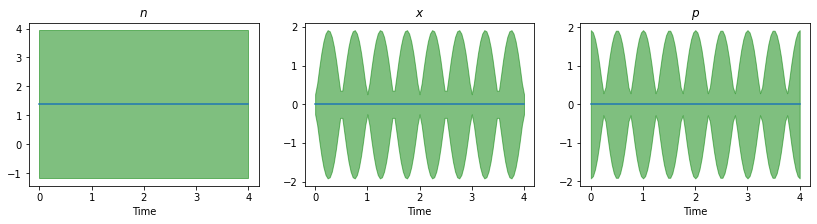

In [19]:
sqv = squeeze(N, 1.0) * basis(N, 0)
resultsv = mesolve(H, sqv, tlist)
plot_expect_with_variance(N, [n, x, p], [r'$n$', r'$x$', r'$p$'], resultsv.states);

可以看到，在某一个时刻，若x的不确定度很小（小于 $ \hbar / 2 $），那么相应的p算符的不确定度就很大。
关于压缩态的“压缩”，我们可以在Wigner表象下很好的看出来：

(<Figure size 576x288 with 2 Axes>,
 array([<AxesSubplot:xlabel='Fock number', ylabel='Occupation probability'>,
        <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>],
       dtype=object))

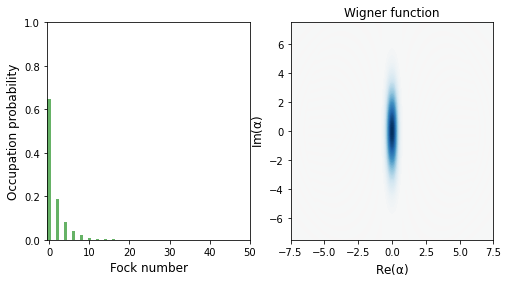

In [20]:
plot_wigner_fock_distribution(sqv)

我们可以看到，x的不确定度被压缩了，而相应的p被拉长了。

## Squeezed coherent state

我们再来看一个压缩相干态的例子：

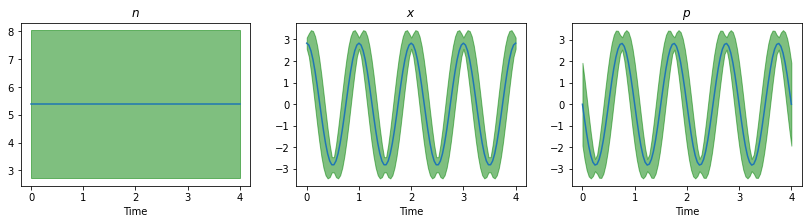

In [22]:
psi0 = displace(N, 2) * squeeze(N, 1.0) * basis(N, 0)  # first squeeze vacuum and then displace
result = mesolve(H, psi0, tlist, c_ops, [])
plot_expect_with_variance(N, [n, x, p], [r'$n$', r'$x$', r'$p$'], result.states);

(<Figure size 576x288 with 2 Axes>,
 array([<AxesSubplot:xlabel='Fock number', ylabel='Occupation probability'>,
        <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>],
       dtype=object))

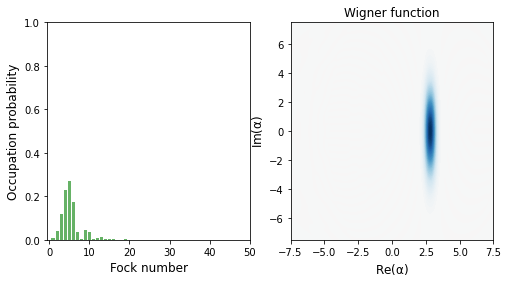

In [23]:
plot_wigner_fock_distribution(psi0)

## Thermal state
接下来是热态，热态是一个混态，因此不能使用ket表示，只能写成密度矩阵的形式。顾名思义，热态的密度矩阵就是正则系综的密度矩阵。即：
$$ \rho = \frac{exp(-H/k_B T)}{Tr[exp(-H/k_B T)]}$$
在粒子数表象下，我们可以写成：
$$ \rho = \sum \frac{<n>^n}{(1+<n>)^{n+1}}|n><n|$$
因此在qutip中，热态的参数为维度N以及粒子数期望值$<n>$

(<Figure size 576x288 with 2 Axes>,
 array([<AxesSubplot:xlabel='Fock number', ylabel='Occupation probability'>,
        <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>],
       dtype=object))

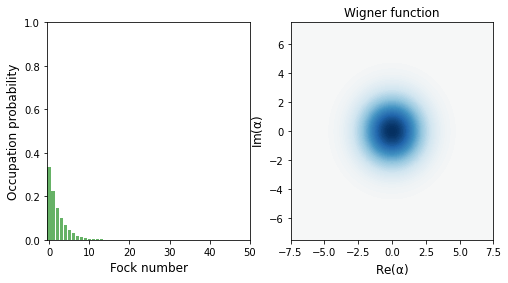

In [25]:
rho_thermal = thermal_dm(N,2)
plot_wigner_fock_distribution(rho_thermal)